In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from kmodes.kmodes import KModes
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import sklearn
from sklearn import svm
from sklearn.preprocessing import PowerTransformer

In [2]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import keras
from keras.layers import Embedding
from random import randrange
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm 
from sklearn.impute import KNNImputer

In [94]:
df = pd.read_csv("merged.csv", sep=",", header=None, engine='python', encoding="utf-8-sig") 

In [95]:
header = df.iloc[0]
# take the rest of your data minus the header row
df = df[1:]
# set the header row as the df header
df.columns = header
pd.set_option('display.max_rows', 7500)
pd.set_option('display.max_columns', 106)
df.head(5)

,NaN,Year,Name,College_x,POS_x,Height,Weight,HandSize,ArmLength,Wonderlic,Forty,BenchPress,VerticalJump,BroadJump,Shuttle,Cone,60YdShuttle,College_y,Round,Pick,Team,Player_Id,HOF,POS_y,PositionStandard,AV,Age,To,AP1,PB,St,CarAV,DrAV,G,Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk
1,0.0,1989,Jim Zdelar,Youngstown St.,OT,76.0,290,NaN,NaN,NaN,5.33,21,30,98,4.91,NaN,NaN,NaN,7,176,MIA,NaN,No,OT,T,0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Youngstown St.
2,1.0,2004,Nate Lawrie,Yale,TE,78.0,264,NaN,NaN,NaN,4.87,23,34,117,4.12,6.71,NaN,Yale,6,181,TAM,LawrNa00,No,TE,TE,0,22,2008,0,0,0,0,0,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,43,0,NaN,NaN,NaN
3,2.0,1997,Steve Scifres,Wyoming,OG,75.9,294,9.8,34.3,NaN,5.45,33,30,105,4.53,7.95,NaN,Wyoming,3,83,DAL,ScifSt20,No,OG,G,0,25,1998,0,0,0,0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,1994,Ryan Yarborough,Wyoming,WR,72.9,194,9.5,31.8,NaN,4.59,NaN,34.5,116,NaN,NaN,NaN,Wyoming,2,41,NYJ,YarbRy00,No,WR,WR,2,23,1998,0,0,0,2,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,494,3,NaN,NaN,NaN
5,4.0,1995,Ryan Christopherson,Wyoming,FB,70.8,243,9.6,30.5,NaN,4.70,24,35,119,4.09,NaN,11.35,Wyoming,5,169,JAX,ChriRy20,No,RB,RB,0,23,1996,0,0,0,0,0,19,NaN,NaN,NaN,NaN,NaN,16,16,1,1,-1,0,NaN,NaN,NaN


In [96]:
df = df.rename(columns={'NaN': 'index', 'POS_x': 'Pos', 'College_x': 'College'})

In [97]:
df.isnull().sum()

0
NaN                    0
Year                   0
Name                   0
College                0
Pos                    0
Height                 0
Weight                 0
HandSize             677
ArmLength            874
Wonderlic           5365
Forty                473
BenchPress          1583
VerticalJump         905
BroadJump           1003
Shuttle             1433
Cone                2998
60YdShuttle         3800
College_y           1881
Round                  0
Pick                   0
Team                   0
Player_Id            564
HOF                    0
POS_y                  0
PositionStandard       0
AV                     0
Age                  583
To                   677
AP1                    0
PB                     0
St                     0
CarAV                677
DrAV                1120
G                    698
Cmp                 5210
Pass_Att            5210
Pass_Yds            5210
Pass_TD             5210
Pass_Int            5210
Rush_Att            445

In [98]:
#df['Pick'] = df.Pick.fillna(260)

In [99]:
#df['Round'] = df.Round.replace(np.nan, 'Undrafted', regex=True)
#df['Round'] = df.Round.fillna(8)

In [100]:
#df['Team'] = df.Team.replace(np.nan, 'Free Agent', regex=True)

In [101]:
#df.isnull().sum()

In [102]:
df.head(5)

,NaN,Year,Name,College,Pos,Height,Weight,HandSize,ArmLength,Wonderlic,Forty,BenchPress,VerticalJump,BroadJump,Shuttle,Cone,60YdShuttle,College_y,Round,Pick,Team,Player_Id,HOF,POS_y,PositionStandard,AV,Age,To,AP1,PB,St,CarAV,DrAV,G,Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk
1,0.0,1989,Jim Zdelar,Youngstown St.,OT,76.0,290,NaN,NaN,NaN,5.33,21,30,98,4.91,NaN,NaN,NaN,7,176,MIA,NaN,No,OT,T,0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Youngstown St.
2,1.0,2004,Nate Lawrie,Yale,TE,78.0,264,NaN,NaN,NaN,4.87,23,34,117,4.12,6.71,NaN,Yale,6,181,TAM,LawrNa00,No,TE,TE,0,22,2008,0,0,0,0,0,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,43,0,NaN,NaN,NaN
3,2.0,1997,Steve Scifres,Wyoming,OG,75.9,294,9.8,34.3,NaN,5.45,33,30,105,4.53,7.95,NaN,Wyoming,3,83,DAL,ScifSt20,No,OG,G,0,25,1998,0,0,0,0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,1994,Ryan Yarborough,Wyoming,WR,72.9,194,9.5,31.8,NaN,4.59,NaN,34.5,116,NaN,NaN,NaN,Wyoming,2,41,NYJ,YarbRy00,No,WR,WR,2,23,1998,0,0,0,2,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,494,3,NaN,NaN,NaN
5,4.0,1995,Ryan Christopherson,Wyoming,FB,70.8,243,9.6,30.5,NaN,4.70,24,35,119,4.09,NaN,11.35,Wyoming,5,169,JAX,ChriRy20,No,RB,RB,0,23,1996,0,0,0,0,0,19,NaN,NaN,NaN,NaN,NaN,16,16,1,1,-1,0,NaN,NaN,NaN


In [103]:
#df = df.dropna(axis=1)
#df3.head(5)

In [104]:
# Cleaning Check
#df.isnull().sum()

In [105]:
df.dtypes

0
NaN                 float64
Year                 object
Name                 object
College              object
Pos                  object
Height               object
Weight               object
HandSize             object
ArmLength            object
Wonderlic            object
Forty                object
BenchPress           object
VerticalJump         object
BroadJump            object
Shuttle              object
Cone                 object
60YdShuttle          object
College_y            object
Round                object
Pick                 object
Team                 object
Player_Id            object
HOF                  object
POS_y                object
PositionStandard     object
AV                   object
Age                  object
To                   object
AP1                  object
PB                   object
St                   object
CarAV                object
DrAV                 object
G                    object
Cmp                  object
Pass_Att          

In [107]:
df["Forty"] = df.Forty.astype(float)
df["VerticalJump"] = df.VerticalJump.astype(float)
df["BenchPress"] = df.BenchPress.astype(float)
df["BroadJump"] = df.BroadJump.astype(float)
df["Cone"] = df.Cone.astype(float)
df["Shuttle"] = df.Shuttle.astype(float)
df["Round"] = df.Round.astype(float)
df["Pick"] = df.Pick.astype(float)
df["Year"] = df.Year.astype(int)
df["Height"] = df.Height.astype(float)
df["Weight"] = df.Weight.astype(int)
df["AV"] = df.AV.astype(float)

In [108]:
df.dtypes

0
NaN                 float64
Year                  int32
Name                 object
College              object
Pos                  object
Height              float64
Weight                int32
HandSize             object
ArmLength            object
Wonderlic            object
Forty               float64
BenchPress          float64
VerticalJump        float64
BroadJump           float64
Shuttle             float64
Cone                float64
60YdShuttle          object
College_y            object
Round               float64
Pick                float64
Team                 object
Player_Id            object
HOF                  object
POS_y                object
PositionStandard     object
AV                  float64
Age                  object
To                   object
AP1                  object
PB                   object
St                   object
CarAV                object
DrAV                 object
G                    object
Cmp                  object
Pass_Att          

In [109]:
df.isna().sum()

0
NaN                    0
Year                   0
Name                   0
College                0
Pos                    0
Height                 0
Weight                 0
HandSize             677
ArmLength            874
Wonderlic           5365
Forty                473
BenchPress          1583
VerticalJump         905
BroadJump           1003
Shuttle             1433
Cone                2998
60YdShuttle         3800
College_y           1881
Round                  0
Pick                   0
Team                   0
Player_Id            564
HOF                    0
POS_y                  0
PositionStandard       0
AV                     0
Age                  583
To                   677
AP1                    0
PB                     0
St                     0
CarAV                677
DrAV                1120
G                    698
Cmp                 5210
Pass_Att            5210
Pass_Yds            5210
Pass_TD             5210
Pass_Int            5210
Rush_Att            445

In [110]:
train = df
test = df.drop(columns = ['Pick'], axis = 1)

In [111]:
train_original = train.copy()
test_original = test.copy()

In [112]:
train.columns

Index([               nan,             'Year',             'Name',
                'College',              'Pos',           'Height',
                 'Weight',         'HandSize',        'ArmLength',
              'Wonderlic',            'Forty',       'BenchPress',
           'VerticalJump',        'BroadJump',          'Shuttle',
                   'Cone',      '60YdShuttle',        'College_y',
                  'Round',             'Pick',             'Team',
              'Player_Id',              'HOF',            'POS_y',
       'PositionStandard',               'AV',              'Age',
                     'To',              'AP1',               'PB',
                     'St',            'CarAV',             'DrAV',
                      'G',              'Cmp',         'Pass_Att',
               'Pass_Yds',          'Pass_TD',         'Pass_Int',
               'Rush_Att',         'Rush_Yds',         'Rush_TDs',
                    'Rec',          'Rec_Yds',          'Rec_T

In [113]:
test.columns

Index([               nan,             'Year',             'Name',
                'College',              'Pos',           'Height',
                 'Weight',         'HandSize',        'ArmLength',
              'Wonderlic',            'Forty',       'BenchPress',
           'VerticalJump',        'BroadJump',          'Shuttle',
                   'Cone',      '60YdShuttle',        'College_y',
                  'Round',             'Team',        'Player_Id',
                    'HOF',            'POS_y', 'PositionStandard',
                     'AV',              'Age',               'To',
                    'AP1',               'PB',               'St',
                  'CarAV',             'DrAV',                'G',
                    'Cmp',         'Pass_Att',         'Pass_Yds',
                'Pass_TD',         'Pass_Int',         'Rush_Att',
               'Rush_Yds',         'Rush_TDs',              'Rec',
                'Rec_Yds',          'Rec_Tds',              'T

In [114]:
print('Training data shape: ', train.shape)
train.head(5)

Training data shape:  (5647, 48)


,NaN,Year,Name,College,Pos,Height,Weight,HandSize,ArmLength,Wonderlic,Forty,BenchPress,VerticalJump,BroadJump,Shuttle,Cone,60YdShuttle,College_y,Round,Pick,Team,Player_Id,HOF,POS_y,PositionStandard,AV,Age,To,AP1,PB,St,CarAV,DrAV,G,Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk
1,0.0,1989,Jim Zdelar,Youngstown St.,OT,76.0,290,NaN,NaN,NaN,5.33,21.0,30.0,98.0,4.91,NaN,NaN,NaN,7.0,176.0,MIA,NaN,No,OT,T,0.0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Youngstown St.
2,1.0,2004,Nate Lawrie,Yale,TE,78.0,264,NaN,NaN,NaN,4.87,23.0,34.0,117.0,4.12,6.71,NaN,Yale,6.0,181.0,TAM,LawrNa00,No,TE,TE,0.0,22,2008,0,0,0,0,0,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,43,0,NaN,NaN,NaN
3,2.0,1997,Steve Scifres,Wyoming,OG,75.9,294,9.8,34.3,NaN,5.45,33.0,30.0,105.0,4.53,7.95,NaN,Wyoming,3.0,83.0,DAL,ScifSt20,No,OG,G,0.0,25,1998,0,0,0,0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,1994,Ryan Yarborough,Wyoming,WR,72.9,194,9.5,31.8,NaN,4.59,NaN,34.5,116.0,NaN,NaN,NaN,Wyoming,2.0,41.0,NYJ,YarbRy00,No,WR,WR,2.0,23,1998,0,0,0,2,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,494,3,NaN,NaN,NaN
5,4.0,1995,Ryan Christopherson,Wyoming,FB,70.8,243,9.6,30.5,NaN,4.70,24.0,35.0,119.0,4.09,NaN,11.35,Wyoming,5.0,169.0,JAX,ChriRy20,No,RB,RB,0.0,23,1996,0,0,0,0,0,19,NaN,NaN,NaN,NaN,NaN,16,16,1,1,-1,0,NaN,NaN,NaN


In [115]:
print('Test data shape: ', test.shape)
test.head(5)

Test data shape:  (5647, 47)


,NaN,Year,Name,College,Pos,Height,Weight,HandSize,ArmLength,Wonderlic,Forty,BenchPress,VerticalJump,BroadJump,Shuttle,Cone,60YdShuttle,College_y,Round,Team,Player_Id,HOF,POS_y,PositionStandard,AV,Age,To,AP1,PB,St,CarAV,DrAV,G,Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk
1,0.0,1989,Jim Zdelar,Youngstown St.,OT,76.0,290,NaN,NaN,NaN,5.33,21.0,30.0,98.0,4.91,NaN,NaN,NaN,7.0,MIA,NaN,No,OT,T,0.0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Youngstown St.
2,1.0,2004,Nate Lawrie,Yale,TE,78.0,264,NaN,NaN,NaN,4.87,23.0,34.0,117.0,4.12,6.71,NaN,Yale,6.0,TAM,LawrNa00,No,TE,TE,0.0,22,2008,0,0,0,0,0,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,43,0,NaN,NaN,NaN
3,2.0,1997,Steve Scifres,Wyoming,OG,75.9,294,9.8,34.3,NaN,5.45,33.0,30.0,105.0,4.53,7.95,NaN,Wyoming,3.0,DAL,ScifSt20,No,OG,G,0.0,25,1998,0,0,0,0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,1994,Ryan Yarborough,Wyoming,WR,72.9,194,9.5,31.8,NaN,4.59,NaN,34.5,116.0,NaN,NaN,NaN,Wyoming,2.0,NYJ,YarbRy00,No,WR,WR,2.0,23,1998,0,0,0,2,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,494,3,NaN,NaN,NaN
5,4.0,1995,Ryan Christopherson,Wyoming,FB,70.8,243,9.6,30.5,NaN,4.70,24.0,35.0,119.0,4.09,NaN,11.35,Wyoming,5.0,JAX,ChriRy20,No,RB,RB,0.0,23,1996,0,0,0,0,0,19,NaN,NaN,NaN,NaN,NaN,16,16,1,1,-1,0,NaN,NaN,NaN


In [116]:
train["Pick"].size

5647

In [117]:
train["Pick"].value_counts()

46.0     29
57.0     29
39.0     28
52.0     28
23.0     28
82.0     28
15.0     27
32.0     27
96.0     27
123.0    27
54.0     27
71.0     27
27.0     27
94.0     26
48.0     26
13.0     26
35.0     26
25.0     26
10.0     26
75.0     26
70.0     26
31.0     26
37.0     26
56.0     26
124.0    26
22.0     26
115.0    26
51.0     26
30.0     26
76.0     26
62.0     26
73.0     26
20.0     26
95.0     26
133.0    26
66.0     26
128.0    26
44.0     26
50.0     26
19.0     26
17.0     26
43.0     26
36.0     26
18.0     25
64.0     25
60.0     25
88.0     25
104.0    25
34.0     25
1.0      25
92.0     25
49.0     25
137.0    25
14.0     25
28.0     25
38.0     25
55.0     25
101.0    25
29.0     25
65.0     25
84.0     25
140.0    25
8.0      25
106.0    25
89.0     25
110.0    25
171.0    25
93.0     25
81.0     25
97.0     25
147.0    25
109.0    25
41.0     25
47.0     25
79.0     25
61.0     25
45.0     25
11.0     25
53.0     25
26.0     25
114.0    25
116.0    25
67.0     25
72.0

In [118]:
# Normalize can be set to True to print proportions instead of number 
train["Pick"].value_counts(normalize=True)*100

46.0     0.513547
57.0     0.513547
39.0     0.495838
52.0     0.495838
23.0     0.495838
82.0     0.495838
15.0     0.478130
32.0     0.478130
96.0     0.478130
123.0    0.478130
54.0     0.478130
71.0     0.478130
27.0     0.478130
94.0     0.460421
48.0     0.460421
13.0     0.460421
35.0     0.460421
25.0     0.460421
10.0     0.460421
75.0     0.460421
70.0     0.460421
31.0     0.460421
37.0     0.460421
56.0     0.460421
124.0    0.460421
22.0     0.460421
115.0    0.460421
51.0     0.460421
30.0     0.460421
76.0     0.460421
62.0     0.460421
73.0     0.460421
20.0     0.460421
95.0     0.460421
133.0    0.460421
66.0     0.460421
128.0    0.460421
44.0     0.460421
50.0     0.460421
19.0     0.460421
17.0     0.460421
43.0     0.460421
36.0     0.460421
18.0     0.442713
64.0     0.442713
60.0     0.442713
88.0     0.442713
104.0    0.442713
34.0     0.442713
1.0      0.442713
92.0     0.442713
49.0     0.442713
137.0    0.442713
14.0     0.442713
28.0     0.442713
38.0     0

In [119]:
# train["Pick"].value_counts(normalize=True).plot.bar(title = 'Pick', figsize=(12,8))
# plt.xticks(rotation=45)

Text(0.5, 1.0, 'Ht vs. Wt')

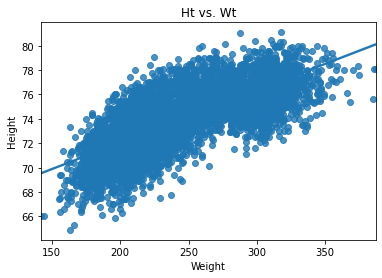

In [120]:
# Height vs Weight
sns.regplot(x='Weight',y='Height',data=df)
plt.title('Ht vs. Wt')

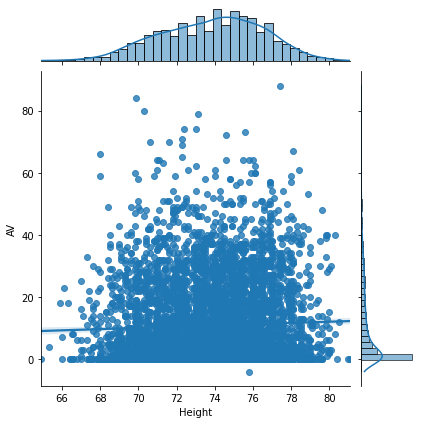

In [121]:
activeqb = df[df['Pick'] > 4]

def r2(Height, Weight):
    return stats.pearsonr(Ht, AV)[0] ** 2
sns.jointplot(x='Height',y='AV',data=activeqb, kind="reg")
#sns.jointplot(x='Ht',y='AV',data=activeqb, kind="reg", stat_func=r2)

In [122]:
train["Forty"].value_counts()

4.59    104
4.56    102
4.53     99
4.65     98
4.62     98
4.55     95
4.50     94
4.61     94
4.52     94
4.60     86
4.58     83
4.57     81
4.49     80
4.63     79
4.68     76
4.54     75
4.46     75
4.64     71
4.71     69
4.84     64
4.51     64
4.69     63
4.48     63
4.67     61
4.47     60
4.75     59
4.83     59
4.76     57
4.44     56
4.78     56
4.43     56
4.79     55
4.45     54
4.74     54
4.66     52
4.86     52
5.18     51
4.85     51
4.77     51
4.89     49
5.14     49
4.72     49
4.73     48
4.70     47
4.96     47
4.81     46
4.40     46
5.12     45
4.88     45
5.07     44
4.82     43
4.80     43
4.93     42
4.90     42
4.42     41
4.94     40
4.41     39
5.19     39
5.09     39
4.92     37
4.95     37
5.08     37
5.28     36
4.97     36
5.30     34
4.91     34
5.03     33
4.87     33
5.06     32
5.24     32
5.05     31
5.21     31
5.11     30
5.33     29
4.99     29
5.29     28
5.25     28
4.38     28
5.00     27
5.04     27
5.02     27
5.26     26
5.10     26
5.01

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150]),
 [Text(0, 0, '4.59'),
  Text(1, 0, '4.56'),
  Text(2, 0, '4.53'),
  Text(3, 0, '4.65'),
  Text(4, 0, '4.62'),
  Text(5, 0, '4.55'),
  Text(6, 0, '4

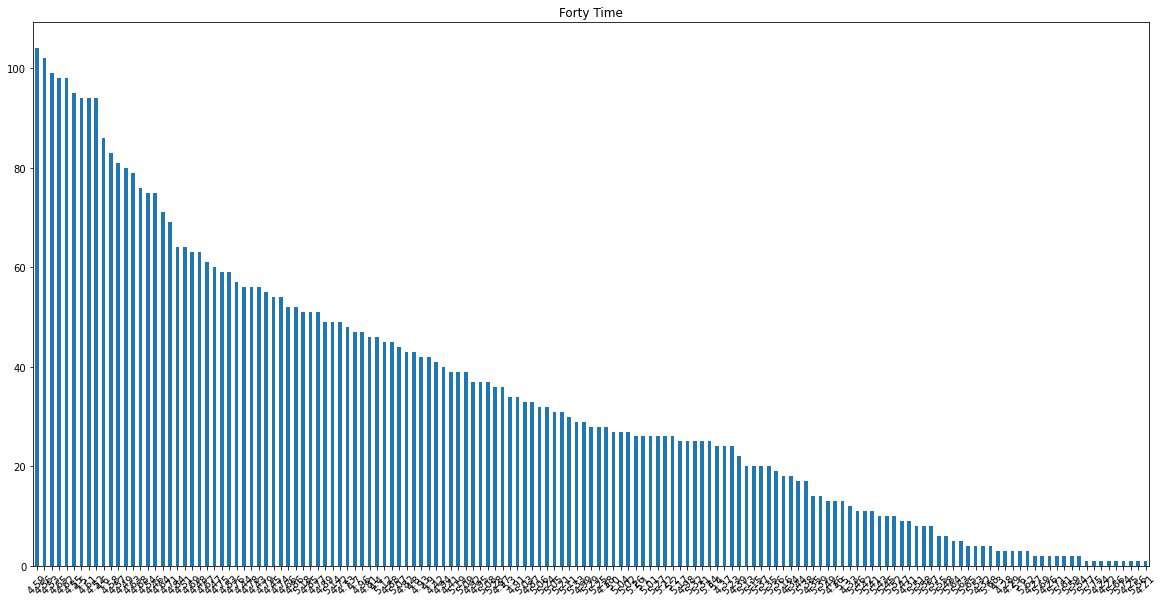

In [123]:
train['Forty'].value_counts(normalize=False).plot.bar(figsize=(20,10), title= 'Forty Time')
plt.xticks(rotation=45)

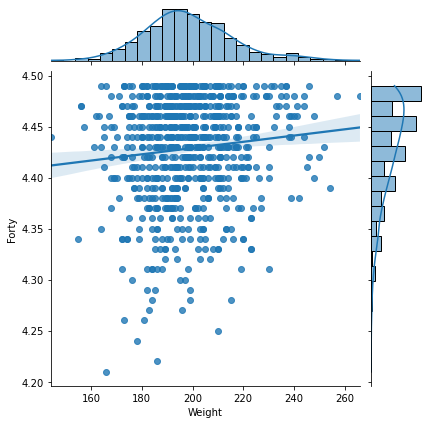

In [124]:
activeqb = df[df['Forty'] < 4.5] # looks at players on the more speeder side

def r2(Height, First4AV):
    return stats.pearsonr(Wt, Forty)[0] ** 2
sns.jointplot(x='Weight',y='Forty',data=activeqb, kind="reg")
#sns.jointplot(x='Ht',y='AV',data=activeqb, kind="reg", stat_func=r2)

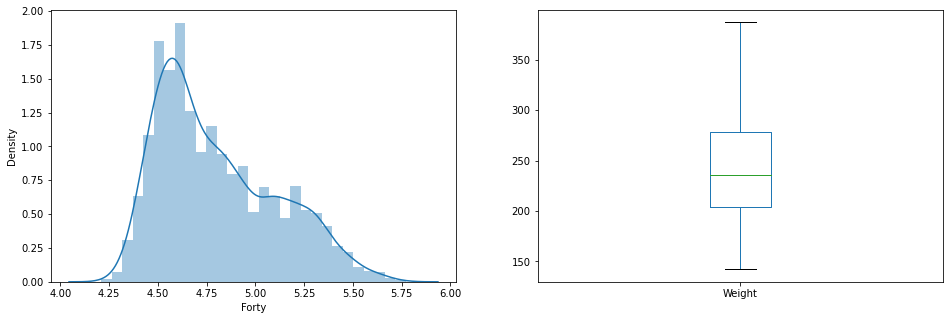

In [125]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["Forty"]);

plt.subplot(122)
train["Weight"].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 1.0, 'Cor Plot')

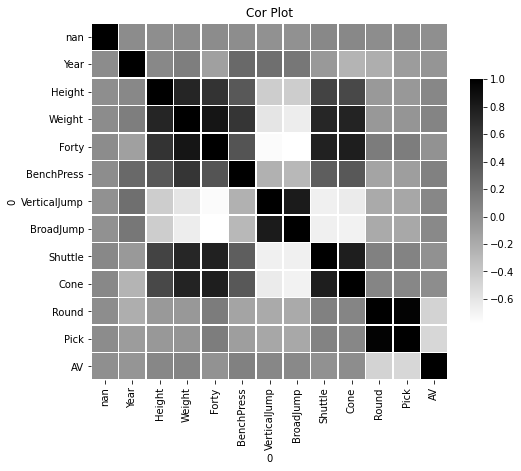

In [126]:
plt.figure(figsize=(8,9))
corr = df.corr()
sns.heatmap(corr,square=True,linewidths=.5, cbar_kws={"shrink": .5},cmap="binary")
plt.title('Cor Plot')

Text(0.5, 1.0, 'Value by Round')

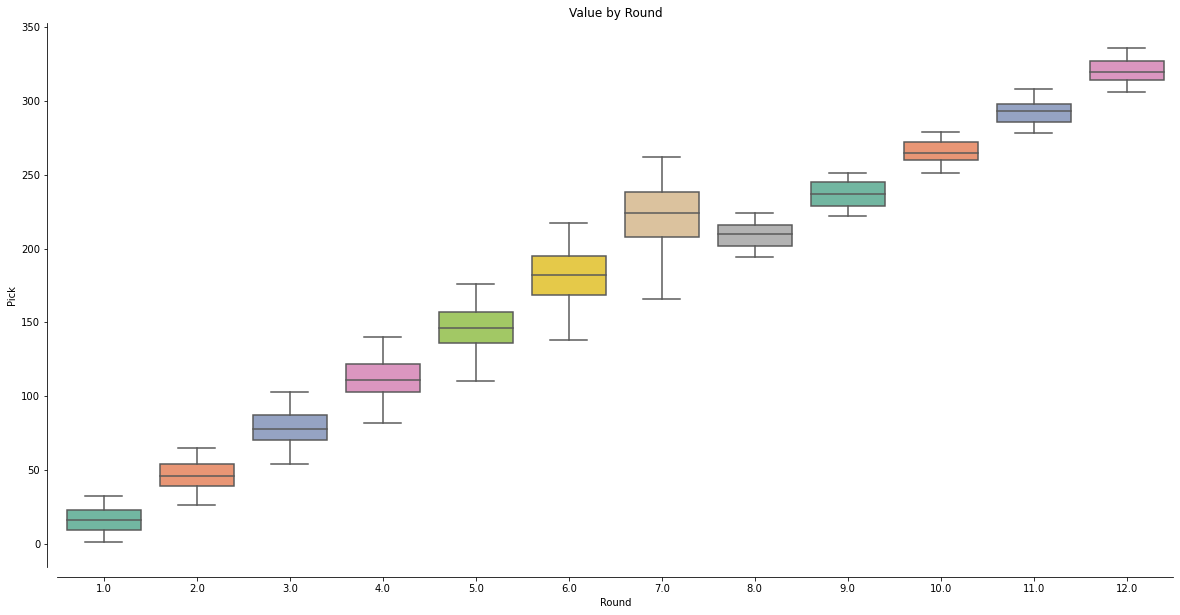

In [127]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Round',y='Pick',data=df,palette="Set2")
sns.despine(offset=10, trim=False)
plt.title('Value by Round')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'WR'),
  Text(1, 0, 'LB'),
  Text(2, 0, 'DB'),
  Text(3, 0, 'DE'),
  Text(4, 0, 'OT'),
  Text(5, 0, 'RB'),
  Text(6, 0, 'DT'),
  Text(7, 0, 'OG'),
  Text(8, 0, 'TE'),
  Text(9, 0, 'QB')])

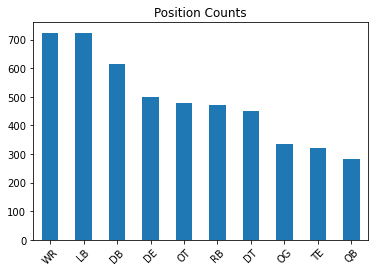

In [128]:
df.Pos.value_counts().iloc[:10].plot(kind='bar')
plt.title('Position Counts')
plt.xticks(rotation=45)

In [129]:
oline = df[(df['Pos'] == 'OT') | (df['Pos'] == 'OG') | (df['Pos'] == 'C')]
dline = df[(df['Pos'] == 'EDGE') | (df['Pos'] == 'NT') | (df['Pos'] == 'DT') | (df['Pos'] == 'DE')]
skill = df[(df['Pos'] == 'QB') | (df['Pos'] == 'RB') | (df['Pos']=='WR') | (df['Pos'] == 'TE') | (df['Pos'] == 'FB')]
special = df[(df['Pos'] == 'K') | (df['Pos'] == 'P') | (df['Pos']=='LS')]
db = df[(df['Pos'] == 'SS') | (df['Pos'] == 'FS') | (df['Pos']=='S') | (df['Pos'] == 'CB') | (df['Pos'] == 'DB')]
lb = df[(df['Pos'] == 'OLB') | (df['Pos'] == 'ILB') | (df['Pos']=='LB')]

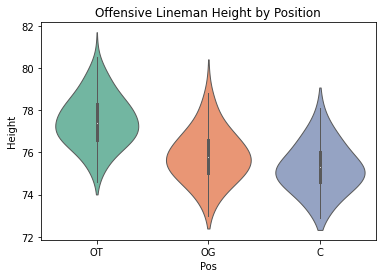

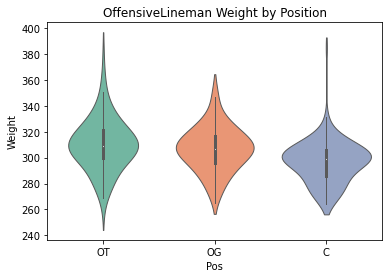

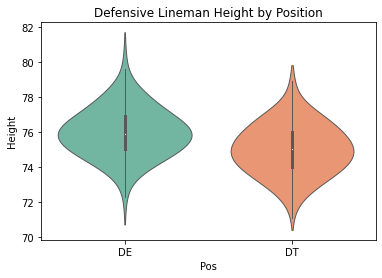

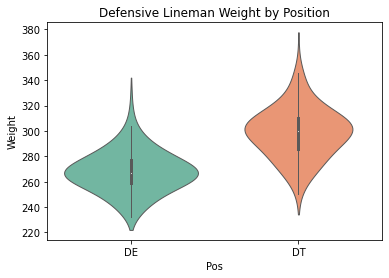

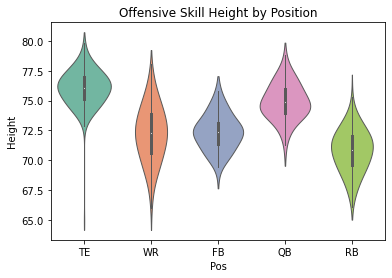

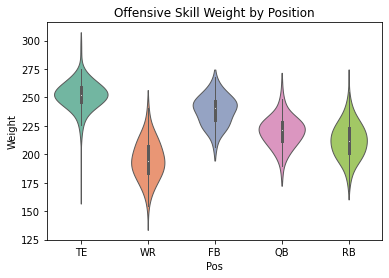

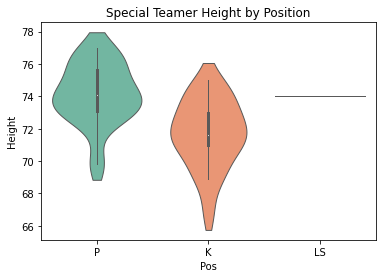

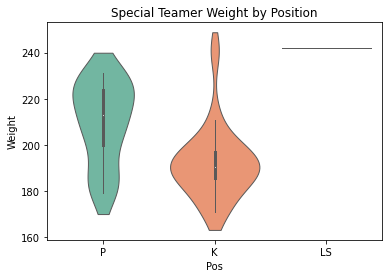

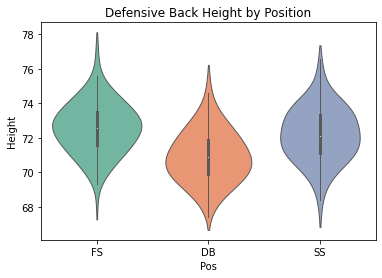

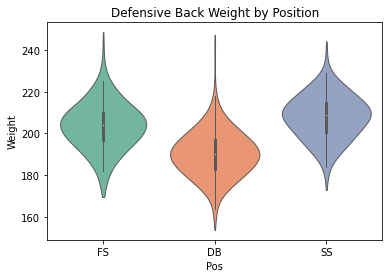

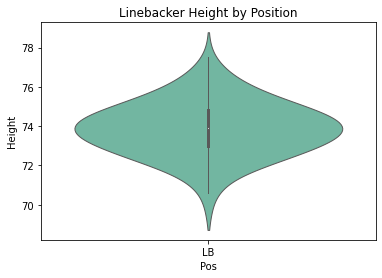

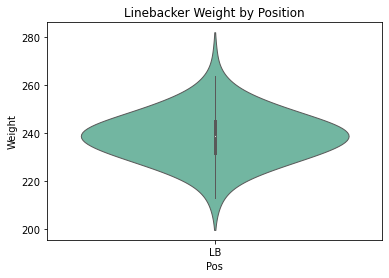

In [130]:
sns.violinplot(x='Pos',y='Height',data=oline,palette="Set2", bw=.5, cut=1, linewidth=1)
plt.title('Offensive Lineman Height by Position')
plt.show()
sns.violinplot(x='Pos',y='Weight',data=oline,palette="Set2", bw=.5, cut=1, linewidth=1)
plt.title('OffensiveLineman Weight by Position')
plt.show()
sns.violinplot(x='Pos',y='Height',data=dline,palette="Set2", bw=.5, cut=1, linewidth=1)
plt.title('Defensive Lineman Height by Position')
plt.show()
sns.violinplot(x='Pos',y='Weight',data=dline,palette="Set2", bw=.5, cut=1, linewidth=1)
plt.title('Defensive Lineman Weight by Position')
plt.show()
sns.violinplot(x='Pos',y='Height',data=skill,palette="Set2", bw=.5, cut=1, linewidth=1)
plt.title('Offensive Skill Height by Position')
plt.show()
sns.violinplot(x='Pos',y='Weight',data=skill,palette="Set2", bw=.5, cut=1, linewidth=1)
plt.title('Offensive Skill Weight by Position')
plt.show()
sns.violinplot(x='Pos',y='Height',data=special,palette="Set2", bw=.5, cut=1, linewidth=1)
plt.title('Special Teamer Height by Position')
plt.show()
sns.violinplot(x='Pos',y='Weight',data=special,palette="Set2", bw=.5, cut=1, linewidth=1)
plt.title('Special Teamer Weight by Position')
plt.show()
sns.violinplot(x='Pos',y='Height',data=db,palette="Set2", bw=.5, cut=1, linewidth=1)
plt.title('Defensive Back Height by Position')
plt.show()
sns.violinplot(x='Pos',y='Weight',data=db,palette="Set2", bw=.5, cut=1, linewidth=1)
plt.title('Defensive Back Weight by Position')
plt.show()
sns.violinplot(x='Pos',y='Height',data=lb,palette="Set2", bw=.5, cut=1, linewidth=1)
plt.title('Linebacker Height by Position')
plt.show()
sns.violinplot(x='Pos',y='Weight',data=lb,palette="Set2", bw=.5, cut=1, linewidth=1)
plt.title('Linebacker Weight by Position')
plt.show()

In [131]:
# Filling Combine Drill Stats with the median value if NaN
df['Forty']=df.groupby(["Pos"]).Forty.apply(lambda x: x.fillna(x.median()))
df['VerticalJump']=df.groupby(["Pos"]).VerticalJump.apply(lambda x: x.fillna(x.median()))
df['BenchPress']=df.groupby(["Pos"]).BenchPress.apply(lambda x: x.fillna(x.median()))
df['BroadJump']=df.groupby(["Pos"]).BroadJump.apply(lambda x: x.fillna(x.median()))
df['Cone']=df.groupby(["Pos"]).Cone.apply(lambda x: x.fillna(x.median()))
df['Shuttle']=df.groupby(["Pos"]).Shuttle.apply(lambda x: x.fillna(x.median()))
df['Pick']= df['Pick'].astype(int)

In [132]:
df.head(100)

,NaN,Year,Name,College,Pos,Height,Weight,HandSize,ArmLength,Wonderlic,Forty,BenchPress,VerticalJump,BroadJump,Shuttle,Cone,60YdShuttle,College_y,Round,Pick,Team,Player_Id,HOF,POS_y,PositionStandard,AV,Age,To,AP1,PB,St,CarAV,DrAV,G,Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk
1,0.0,1989,Jim Zdelar,Youngstown St.,OT,76.0,290,NaN,NaN,NaN,5.330,21.0,30.00,98.0,4.91,7.840,NaN,NaN,7.0,176,MIA,NaN,No,OT,T,0.0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Youngstown St.
2,1.0,2004,Nate Lawrie,Yale,TE,78.0,264,NaN,NaN,NaN,4.870,23.0,34.00,117.0,4.12,6.710,NaN,Yale,6.0,181,TAM,LawrNa00,No,TE,TE,0.0,22,2008,0,0,0,0,0,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,43,0,NaN,NaN,NaN
3,2.0,1997,Steve Scifres,Wyoming,OG,75.9,294,9.8,34.3,NaN,5.450,33.0,30.00,105.0,4.53,7.950,NaN,Wyoming,3.0,83,DAL,ScifSt20,No,OG,G,0.0,25,1998,0,0,0,0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,1994,Ryan Yarborough,Wyoming,WR,72.9,194,9.5,31.8,NaN,4.590,14.0,34.50,116.0,4.19,6.970,NaN,Wyoming,2.0,41,NYJ,YarbRy00,No,WR,WR,2.0,23,1998,0,0,0,2,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,494,3,NaN,NaN,NaN
5,4.0,1995,Ryan Christopherson,Wyoming,FB,70.8,243,9.6,30.5,NaN,4.700,24.0,35.00,119.0,4.09,7.245,11.35,Wyoming,5.0,169,JAX,ChriRy20,No,RB,RB,0.0,23,1996,0,0,0,0,0,19,NaN,NaN,NaN,NaN,NaN,16,16,1,1,-1,0,NaN,NaN,NaN
6,5.0,2014,Robert Herron,Wyoming,WR,69.1,193,9.8,30.5,NaN,4.480,18.0,35.50,124.0,4.27,6.840,NaN,Wyoming,6.0,185,TAM,HerrRo00,No,WR,WR,0.0,22,2014,0,0,0,0,0,8,NaN,NaN,NaN,NaN,NaN,1,0,0,6,58,1,1,NaN,NaN
7,6.0,2001,Patrick Chukwurah,Wyoming,LB,73.6,238,8.5,31.5,NaN,4.750,24.0,40.00,119.0,4.21,7.340,11.78,Wyoming,5.0,157,MIN,ChukPa20,No,LB,LB,5.0,22,2007,0,0,0,8,3,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,9
8,7.0,1991,Mitch Donahue,Wyoming,LB,74.3,254,10.0,32.5,NaN,4.930,24.0,33.50,111.0,4.32,7.180,NaN,NaN,4.0,95,SFO,DonaMi20,No,LB,LB,2.0,23,1994,0,0,0,2,1,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wyoming
9,8.0,2014,Marqueston Huff,Wyoming,FS,71.1,196,9.0,31.4,NaN,4.490,15.0,35.50,116.0,4.19,7.260,NaN,Wyoming,4.0,122,TEN,HuffMa00,No,DB,DB,3.0,22,2016,0,0,0,3,3,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,1,1
10,9.0,2015,Mark Nzeocha,Wyoming,LB,74.4,232,10.0,33.0,NaN,4.560,24.0,33.50,115.0,4.30,7.180,NaN,Wyoming,7.0,236,DAL,NzeoMa00,No,OLB,LB,0.0,25,2016,0,0,0,0,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
df=df.dropna(subset=['Cone','Shuttle'])

In [134]:
# linear regression predicting AV. 
X = df[['Height','Weight','Forty','VerticalJump','BenchPress','BroadJump','Cone','Shuttle','AV']]
Y = df[['Pick']]
model = LinearRegression()
model.fit(X, Y)
model = LinearRegression().fit(X, Y)
   
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Pick   R-squared (uncentered):                   0.801
Model:                            OLS   Adj. R-squared (uncentered):              0.801
Method:                 Least Squares   F-statistic:                              2509.
Date:                Fri, 26 Feb 2021   Prob (F-statistic):                        0.00
Time:                        23:19:12   Log-Likelihood:                         -31332.
No. Observations:                5615   AIC:                                  6.268e+04
Df Residuals:                    5606   BIC:                                  6.274e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Height          -1.3083      0.434     -3.016      0.003      -2.159      -0.458
Weight          -0.6239      0.046    -13.668      0.000      -0.713      -0.534
Forty           89.0302      6.526     13.643      0.000      76.237     101.823
VerticalJump     0.2939      0.385      0.764      0.445      -0.461       1.049
BenchPress       0.0563      0.200      0.282      0.778      -0.335       0.447
BroadJump       -0.8936      0.174     -5.139      0.000      -1.234      -0.553
Cone            -2.9713      4.310     -0.689      0.491     -11.420       5.478
Shuttle         18.9637      6.170      3.073      0.002       6.868      31.060
AV              -2.5888      0.064    -40.420      0.000      -2.714      -2.463
==============================================================================
Omnibus:                      144.124   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.045
Skew:                           0.355   Prob(JB):                     2.36e-31
Kurtosis:                       2.684   Cond. No.                     2.35e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
X = df[['Height','Weight', 'Forty','BroadJump','Shuttle','AV']]
Y = df[['Pick']]
model = LinearRegression()
model.fit(X, Y)
model = LinearRegression().fit(X, Y)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Pick   R-squared (uncentered):                   0.801
Model:                            OLS   Adj. R-squared (uncentered):              0.801
Method:                 Least Squares   F-statistic:                              3765.
Date:                Fri, 26 Feb 2021   Prob (F-statistic):                        0.00
Time:                        23:19:17   Log-Likelihood:                         -31333.
No. Observations:                5615   AIC:                                  6.268e+04
Df Residuals:                    5609   BIC:                                  6.272e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Height        -1.3027      0.425     -3.065      0.002      -2.136      -0.470
Weight        -0.6210      0.036    -17.139      0.000      -0.692      -0.550
Forty         86.5825      5.871     14.747      0.000      75.073      98.092
BroadJump     -0.8111      0.119     -6.801      0.000      -1.045      -0.577
Shuttle       16.7546      5.516      3.037      0.002       5.941      27.569
AV            -2.5889      0.064    -40.466      0.000      -2.714      -2.463
==============================================================================
Omnibus:                      144.386   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.261
Skew:                           0.355   Prob(JB):                     2.12e-31
Kurtosis:                       2.683   Cond. No.                     2.32e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df.head(100)

In [136]:
# X_predict = df[['Wt','Vertical','Cone','Pick']]  
# y_predict = model.predict(X_predict)

# # Actual value over predicted value
# print(df['AV'] - y_predict)

In [137]:
TheGOAT=df[df['Name'] =='Brett Favre']
TheGOAT.head()

,NaN,Year,Name,College,Pos,Height,Weight,HandSize,ArmLength,Wonderlic,Forty,BenchPress,VerticalJump,BroadJump,Shuttle,Cone,60YdShuttle,College_y,Round,Pick,Team,Player_Id,HOF,POS_y,PositionStandard,AV,Age,To,AP1,PB,St,CarAV,DrAV,G,Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk
1326,1325.0,1991,Brett Favre,Southern Mississippi,QB,74.0,217,10.4,31.0,NaN,4.86,16.0,30.5,109.0,4.33,7.13,NaN,NaN,2.0,33,ATL,FavrBr00,No,QB,QB,59.0,21,2010,3,11,19,156,0,302,6300,10169,71838,508,336,602,1844,14,2,-7,0,NaN,NaN,Southern Miss


In [138]:
X_predict = TheGOAT[['Height','Weight', 'Forty','BroadJump','Shuttle','AV']]  
y_predict = model.predict(X_predict)

# Actual value over predicted value
TheGOAT['Pick'] - y_predict

1326    11.988278
dtype: float64

In [139]:
PosQB=df[df['Pos'] == 'QB']
PosQB=PosQB[PosQB['AV'] > 0]
PosQB.sort_values('Name')

,NaN,Year,Name,College,Pos,Height,Weight,HandSize,ArmLength,Wonderlic,Forty,BenchPress,VerticalJump,BroadJump,Shuttle,Cone,60YdShuttle,College_y,Round,Pick,Team,Player_Id,HOF,POS_y,PositionStandard,AV,Age,To,AP1,PB,St,CarAV,DrAV,G,Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk
483,482.0,1999,Aaron Brooks,Virginia,QB,75.5,203,9.5,32.0,17,4.59,16.0,35.5,118.0,4.29,7.52,NaN,Virginia,4.0,131,GNB,BrooAa00,No,QB,QB,64.0,23,2006,0,0,6,65,NaN,93,1673,2963,20261,123,92,362,1534,13,1,1,0,11,NaN,NaN
5012,5011.0,2005,Aaron Rodgers,California,QB,74.0,223,10.1,32.3,39,4.75,16.0,34.5,110.0,4.33,7.38,NaN,California,1.0,24,GNB,RodgAa00,No,QB,QB,34.0,21,2016,2,5,9,112,112,136,2892,4457,35160,282,72,474,2434,24,1,-1,0,6,NaN,NaN
1977,1976.0,1999,Akili Smith,Oregon,QB,74.8,227,9.8,32.3,26,4.70,16.0,34.0,111.0,4.29,6.99,NaN,Oregon,1.0,3,CIN,SmitAk00,No,QB,QB,1.0,24,2002,0,0,1,1,1,22,215,461,2212,5,13,70,371,1,1,6,0,NaN,NaN,NaN
566,565.0,2005,Alex Smith,Utah,QB,76.1,217,9.1,31.8,40,4.78,16.0,32.0,113.0,3.96,6.82,NaN,Stanford,3.0,71,TAM,SmitAl02,No,TE,TE,11.0,23,2015,0,0,3,11,10,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163,1473,13,12,NaN,NaN
565,564.0,2005,Alex Smith,Utah,QB,76.1,217,9.1,31.8,40,4.78,16.0,32.0,113.0,3.96,6.82,NaN,Utah,1.0,1,SFO,SmitAl03,No,QB,QB,14.0,21,2016,0,1,8,72,31,135,2411,3921,26421,151,87,446,1998,10,2,-10,0,9,NaN,NaN
1285,1284.0,2012,Andrew Luck,Stanford,QB,76.0,234,10.0,32.6,37,4.59,16.0,36.0,124.0,4.28,6.80,NaN,Stanford,1.0,1,IND,LuckAn00,No,QB,QB,48.0,23,2016,0,3,4,45,45,65,1460,2481,17665,120,63,273,1347,13,NaN,NaN,NaN,6,NaN,NaN
812,811.0,2011,Andy Dalton,Texas Christian,QB,74.0,215,9.5,31.8,29,4.83,16.0,29.5,106.0,4.27,6.93,NaN,TCU,2.0,35,CIN,DaltAn00,No,QB,QB,61.0,23,2016,0,2,6,55,55,87,1789,2857,20768,135,79,296,905,17,1,18,1,5,NaN,NaN
4612,4611.0,1989,Anthony Dilweg,Duke,QB,75.4,199,NaN,NaN,NaN,4.78,16.0,28.0,102.0,4.37,7.13,NaN,NaN,3.0,74,GNB,DilwAn00,No,QB,QB,4.0,24,1990,0,0,0,4,4,10,102,193,1274,8,7,21,114,0,NaN,NaN,NaN,NaN,NaN,Duke
3188,3187.0,2004,Ben Roethlisberger,Miami (OH),QB,76.9,241,9.4,31.5,25,4.75,16.0,30.5,109.0,4.33,7.13,NaN,Miami (OH),1.0,11,PIT,RoetBe00,No,QB,QB,57.0,22,2016,0,4,13,108,108,181,3718,5796,45740,295,154,401,1213,16,1,-11,0,8,NaN,NaN
313,312.0,1993,Billy Joe Hobert,Washington,QB,74.6,234,9.8,29.0,NaN,4.89,16.0,30.5,109.0,4.29,7.13,NaN,NaN,3.0,58,RAI,HobeBi00,No,QB,QB,3.0,22,1999,0,0,0,7,3,29,275,527,3371,23,25,33,121,1,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
X_predict = PosQB[['Height','Weight', 'Forty','BroadJump','Shuttle','AV']]  
y_predict = model.predict(X_predict)

In [141]:
# Shows the predicted gain or loss(-) in value
y_predict

30      -34.856940
147     153.981276
155      58.781686
168      99.959538
192     193.334633
205     139.412285
228      53.074233
261     151.094551
262      98.536045
282      84.298922
303     153.579153
304     120.590807
307     182.316053
308     184.436822
313     156.577629
355     182.318539
360      87.497435
369      -2.390900
388     158.818423
435     173.782009
448     116.462200
467      80.760061
483     -16.539899
497      26.349090
565     118.405865
566     126.172546
641     150.866514
659     171.097843
663     110.917162
673     118.159282
675     162.876432
717     132.686946
759     163.535807
764     172.262080
812      15.906710
832     141.039532
837      34.114585
878     146.843721
922      44.582016
988     131.777809
991     150.409339
1053    -35.372002
1092    155.738893
1196     -1.816013
1225    110.977526
1234    190.854260
1241    146.585667
1285     -0.055830
1326     21.011722
1362     94.858506
1364    150.214392
1376    138.648899
1379    167.

In [142]:
#shows predicted Pick from the actual pick spot subtracted by the predicted pick spot, for an increased or decreased value! 
PosQB['Pick'] - y_predict

30      109.856940
147    -109.981276
155     109.218314
168     -60.959538
192     -91.334633
205    -137.412285
228     -52.074233
261     -92.094551
262      19.463955
282     -76.298922
303      63.420847
304     -44.590807
307     -96.316053
308    -107.436822
313     -98.577629
355     -75.318539
360      92.502565
369       3.390900
388    -132.818423
435     110.217991
448     -26.462200
467     174.239939
483     147.539899
497     -15.349090
565    -117.405865
566     -55.172546
641    -138.866514
659      56.902157
663      86.082838
673     -68.159282
675    -130.876432
717      61.313054
759    -112.535807
764      10.737920
812      19.093290
832     -40.039532
837     -26.114585
878    -124.843721
922     -41.582016
988     -46.777809
991     -53.409339
1053     36.372002
1092   -152.738893
1196      3.816013
1225    -18.977526
1234    -56.854260
1241     -9.585667
1285      1.055830
1326     11.988278
1362     46.141494
1364    -51.214392
1376   -128.648899
1379    -69.

In [143]:
# Logistic Regression

In [57]:
x_train,x_cv,y_train,y_cv=train_test_split(X,Y,test_size=0.20,random_state=1)

In [58]:
logistic_model = LogisticRegression(random_state=1)

In [59]:
logistic_model.fit(x_train,y_train)

LogisticRegression(random_state=1)

In [60]:
pred_cv_logistic=logistic_model.predict(x_cv)

In [61]:
score_logistic =accuracy_score(pred_cv_logistic,y_cv)*100 

In [62]:
score_logistic

0.7123775601068566

In [ ]:
# Random Forest

In [63]:
forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)

In [64]:
forest_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=1)

In [65]:
pred_cv_forest=forest_model.predict(x_cv)

In [66]:
score_forest = accuracy_score(pred_cv_forest,y_cv)*100

In [67]:
score_forest

0.7123775601068566

In [ ]:
# Decision Tree

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image  
from sklearn import tree

In [144]:
df2 = pd.read_csv("merged.csv", sep=",", header=None, engine='python') 

In [145]:
header = df2.iloc[0]
# take the rest of your data minus the header row
df2 = df2[1:]
# set the header row as the df header
df2.columns = header
pd.set_option('display.max_rows', 7500)
pd.set_option('display.max_columns', 106)
df2.head(5)

,NaN,Year,Name,College_x,POS_x,Height,Weight,HandSize,ArmLength,Wonderlic,Forty,BenchPress,VerticalJump,BroadJump,Shuttle,Cone,60YdShuttle,College_y,Round,Pick,Team,Player_Id,HOF,POS_y,PositionStandard,AV,Age,To,AP1,PB,St,CarAV,DrAV,G,Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk
1,0.0,1989,Jim Zdelar,Youngstown St.,OT,76.0,290,NaN,NaN,NaN,5.33,21,30,98,4.91,NaN,NaN,NaN,7,176,MIA,NaN,No,OT,T,0,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Youngstown St.
2,1.0,2004,Nate Lawrie,Yale,TE,78.0,264,NaN,NaN,NaN,4.87,23,34,117,4.12,6.71,NaN,Yale,6,181,TAM,LawrNa00,No,TE,TE,0,22,2008,0,0,0,0,0,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,43,0,NaN,NaN,NaN
3,2.0,1997,Steve Scifres,Wyoming,OG,75.9,294,9.8,34.3,NaN,5.45,33,30,105,4.53,7.95,NaN,Wyoming,3,83,DAL,ScifSt20,No,OG,G,0,25,1998,0,0,0,0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,1994,Ryan Yarborough,Wyoming,WR,72.9,194,9.5,31.8,NaN,4.59,NaN,34.5,116,NaN,NaN,NaN,Wyoming,2,41,NYJ,YarbRy00,No,WR,WR,2,23,1998,0,0,0,2,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,494,3,NaN,NaN,NaN
5,4.0,1995,Ryan Christopherson,Wyoming,FB,70.8,243,9.6,30.5,NaN,4.70,24,35,119,4.09,NaN,11.35,Wyoming,5,169,JAX,ChriRy20,No,RB,RB,0,23,1996,0,0,0,0,0,19,NaN,NaN,NaN,NaN,NaN,16,16,1,1,-1,0,NaN,NaN,NaN


In [146]:
df2['Pick'] = df2.Pick.fillna(260)
df2['Round'] = df2.Round.fillna(8)

In [148]:
df2["Forty"] = df2.Forty.astype(float)
df2["VerticalJump"] = df2.VerticalJump.astype(float)
df2["BenchPress"] = df2.BenchPress.astype(float)
df2["BroadJump"] = df2.BroadJump.astype(float)
df2["Cone"] = df2.Cone.astype(float)
df2["Shuttle"] = df2.Shuttle.astype(float)
df2["Round"] = df2.Round.astype(float)
df2["Pick"] = df2.Pick.astype(float)
df2["Year"] = df2.Year.astype(int)
#df2["Height"] = df2.Height.astype(int)
df2["Weight"] = df2.Weight.astype(int)
df2["AV"] = df2.AV.astype(float)

In [149]:
# Filling Combine Drill Stats with the median value if NaN
df2['Forty']=df2.groupby(["POS_x"]).Forty.apply(lambda x: x.fillna(x.mean()))
df2['VerticalJump']=df2.groupby(["POS_x"]).VerticalJump.apply(lambda x: x.fillna(x.mean()))
df2['BenchPress']=df2.groupby(["POS_x"]).BenchPress.apply(lambda x: x.fillna(x.mean()))
df2['BroadJump']=df2.groupby(["POS_x"]).BroadJump.apply(lambda x: x.fillna(x.mean()))
df2['Cone']=df2.groupby(["POS_x"]).Cone.apply(lambda x: x.fillna(x.mean()))
df2['Shuttle']=df2.groupby(["POS_x"]).Shuttle.apply(lambda x: x.fillna(x.mean()))


In [150]:
df2=df2.dropna(subset=['Cone','Shuttle'])

In [151]:
columns="Weight Forty VerticalJump BenchPress BroadJump Cone Shuttle Year AV Pick".split()

In [152]:
df2=pd.DataFrame(df2, columns=columns)
df2.head(100)

,Weight,Forty,VerticalJump,BenchPress,BroadJump,Cone,Shuttle,Year,AV,Pick
1,290,5.330000,30.000000,21.000000,98.000000,7.864130,4.910000,1989,0.0,176.0
2,264,4.870000,34.000000,23.000000,117.000000,6.710000,4.120000,2004,0.0,181.0
3,294,5.450000,30.000000,33.000000,105.000000,7.950000,4.530000,1997,0.0,83.0
4,194,4.590000,34.500000,14.124424,116.000000,6.985079,4.198658,1994,2.0,41.0
5,243,4.700000,35.000000,24.000000,119.000000,7.300937,4.090000,1995,0.0,169.0
6,193,4.480000,35.500000,18.000000,124.000000,6.840000,4.270000,2014,0.0,185.0
7,238,4.750000,40.000000,24.000000,119.000000,7.340000,4.210000,2001,5.0,157.0
8,254,4.930000,33.500000,24.000000,111.000000,7.190523,4.320000,1991,2.0,95.0
9,196,4.490000,35.500000,15.000000,116.000000,7.260000,4.190000,2014,3.0,122.0
10,232,4.560000,33.706954,24.000000,115.734219,7.190523,4.298739,2015,0.0,236.0


In [ ]:
df2 = df2.dropna(axis=1)
df2.head(100)

In [153]:
main_columns = columns
X = df2.drop(columns=['AV']) # main data
y = df2.AV # Target variable

In [154]:
lm=LinearRegression()
lm

LinearRegression()

In [155]:
df.shape

(5615, 48)

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1000)

In [157]:
classifier = DecisionTreeClassifier(max_depth=2) # chooses the depth 
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [158]:
y_pred = classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) # returns the accuracy 

Accuracy: 0.27070347284060553


In [159]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[304   0   0 ...   0   0   0]
 [ 78   0   0 ...   0   0   0]
 [ 52   0   0 ...   0   0   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]]
              precision    recall  f1-score   support

         0.0       0.27      1.00      0.43       304
         1.0       0.00      0.00      0.00        78
         2.0       0.00      0.00      0.00        52
         3.0       0.00      0.00      0.00        49
         4.0       0.00      0.00      0.00        43
         5.0       0.00      0.00      0.00        37
         6.0       0.00      0.00      0.00        37
         7.0       0.00      0.00      0.00        38
         8.0       0.00      0.00      0.00        28
         9.0       0.00      0.00      0.00        18
        10.0       0.00      0.00      0.00        22
        11.0       0.00      0.00      0.00        24
        12.0       0.00      0.00      0.00        21
        13.0       0.00      0.00      0.00        

[Text(1162.5, 1887.5, 'node #0\nAV <= 133.5\ngini = 0.92\nsamples = 4492\nvalue = [1, 1064, 398, 273, 210, 162, 159, 119, 98, 112, 93\n93, 79, 74, 89, 90, 66, 67, 56, 82, 62, 52, 49\n57, 56, 59, 64, 50, 40, 48, 61, 39, 47, 46, 29\n26, 25, 31, 30, 24, 17, 21, 9, 13, 12, 8, 13\n8, 8, 14, 9, 9, 9, 8, 2, 3, 3, 4, 4, 3, 3\n3, 2, 2, 5, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2\n1, 1, 1, 1, 1]'),
 Text(581.25, 1132.5, 'node #1\nAV <= 73.5\ngini = 0.97\nsamples = 2596\nvalue = [0, 255, 178, 125, 118, 87, 99, 75, 62, 67, 64\n64, 58, 56, 62, 72, 45, 42, 44, 70, 49, 43, 43\n45, 47, 49, 53, 42, 31, 39, 50, 31, 42, 39, 28\n23, 18, 30, 29, 22, 17, 19, 8, 12, 11, 8, 13\n8, 8, 12, 9, 8, 8, 8, 2, 3, 2, 4, 4, 3, 3\n3, 2, 2, 4, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2\n1, 1, 1, 1, 1]'),
 Text(290.625, 377.5, 'node #2\ngini = 0.98\nsamples = 1486\nvalue = [0, 68, 57, 42, 44, 37, 50, 41, 31, 40, 38, 35\n33, 26, 35, 38, 27, 24, 28, 47, 28, 32, 27, 35\n34, 35, 39, 28, 22, 30, 41, 24, 31, 32, 22, 20\n16, 28, 24, 19, 16, 18, 7, 7, 9, 

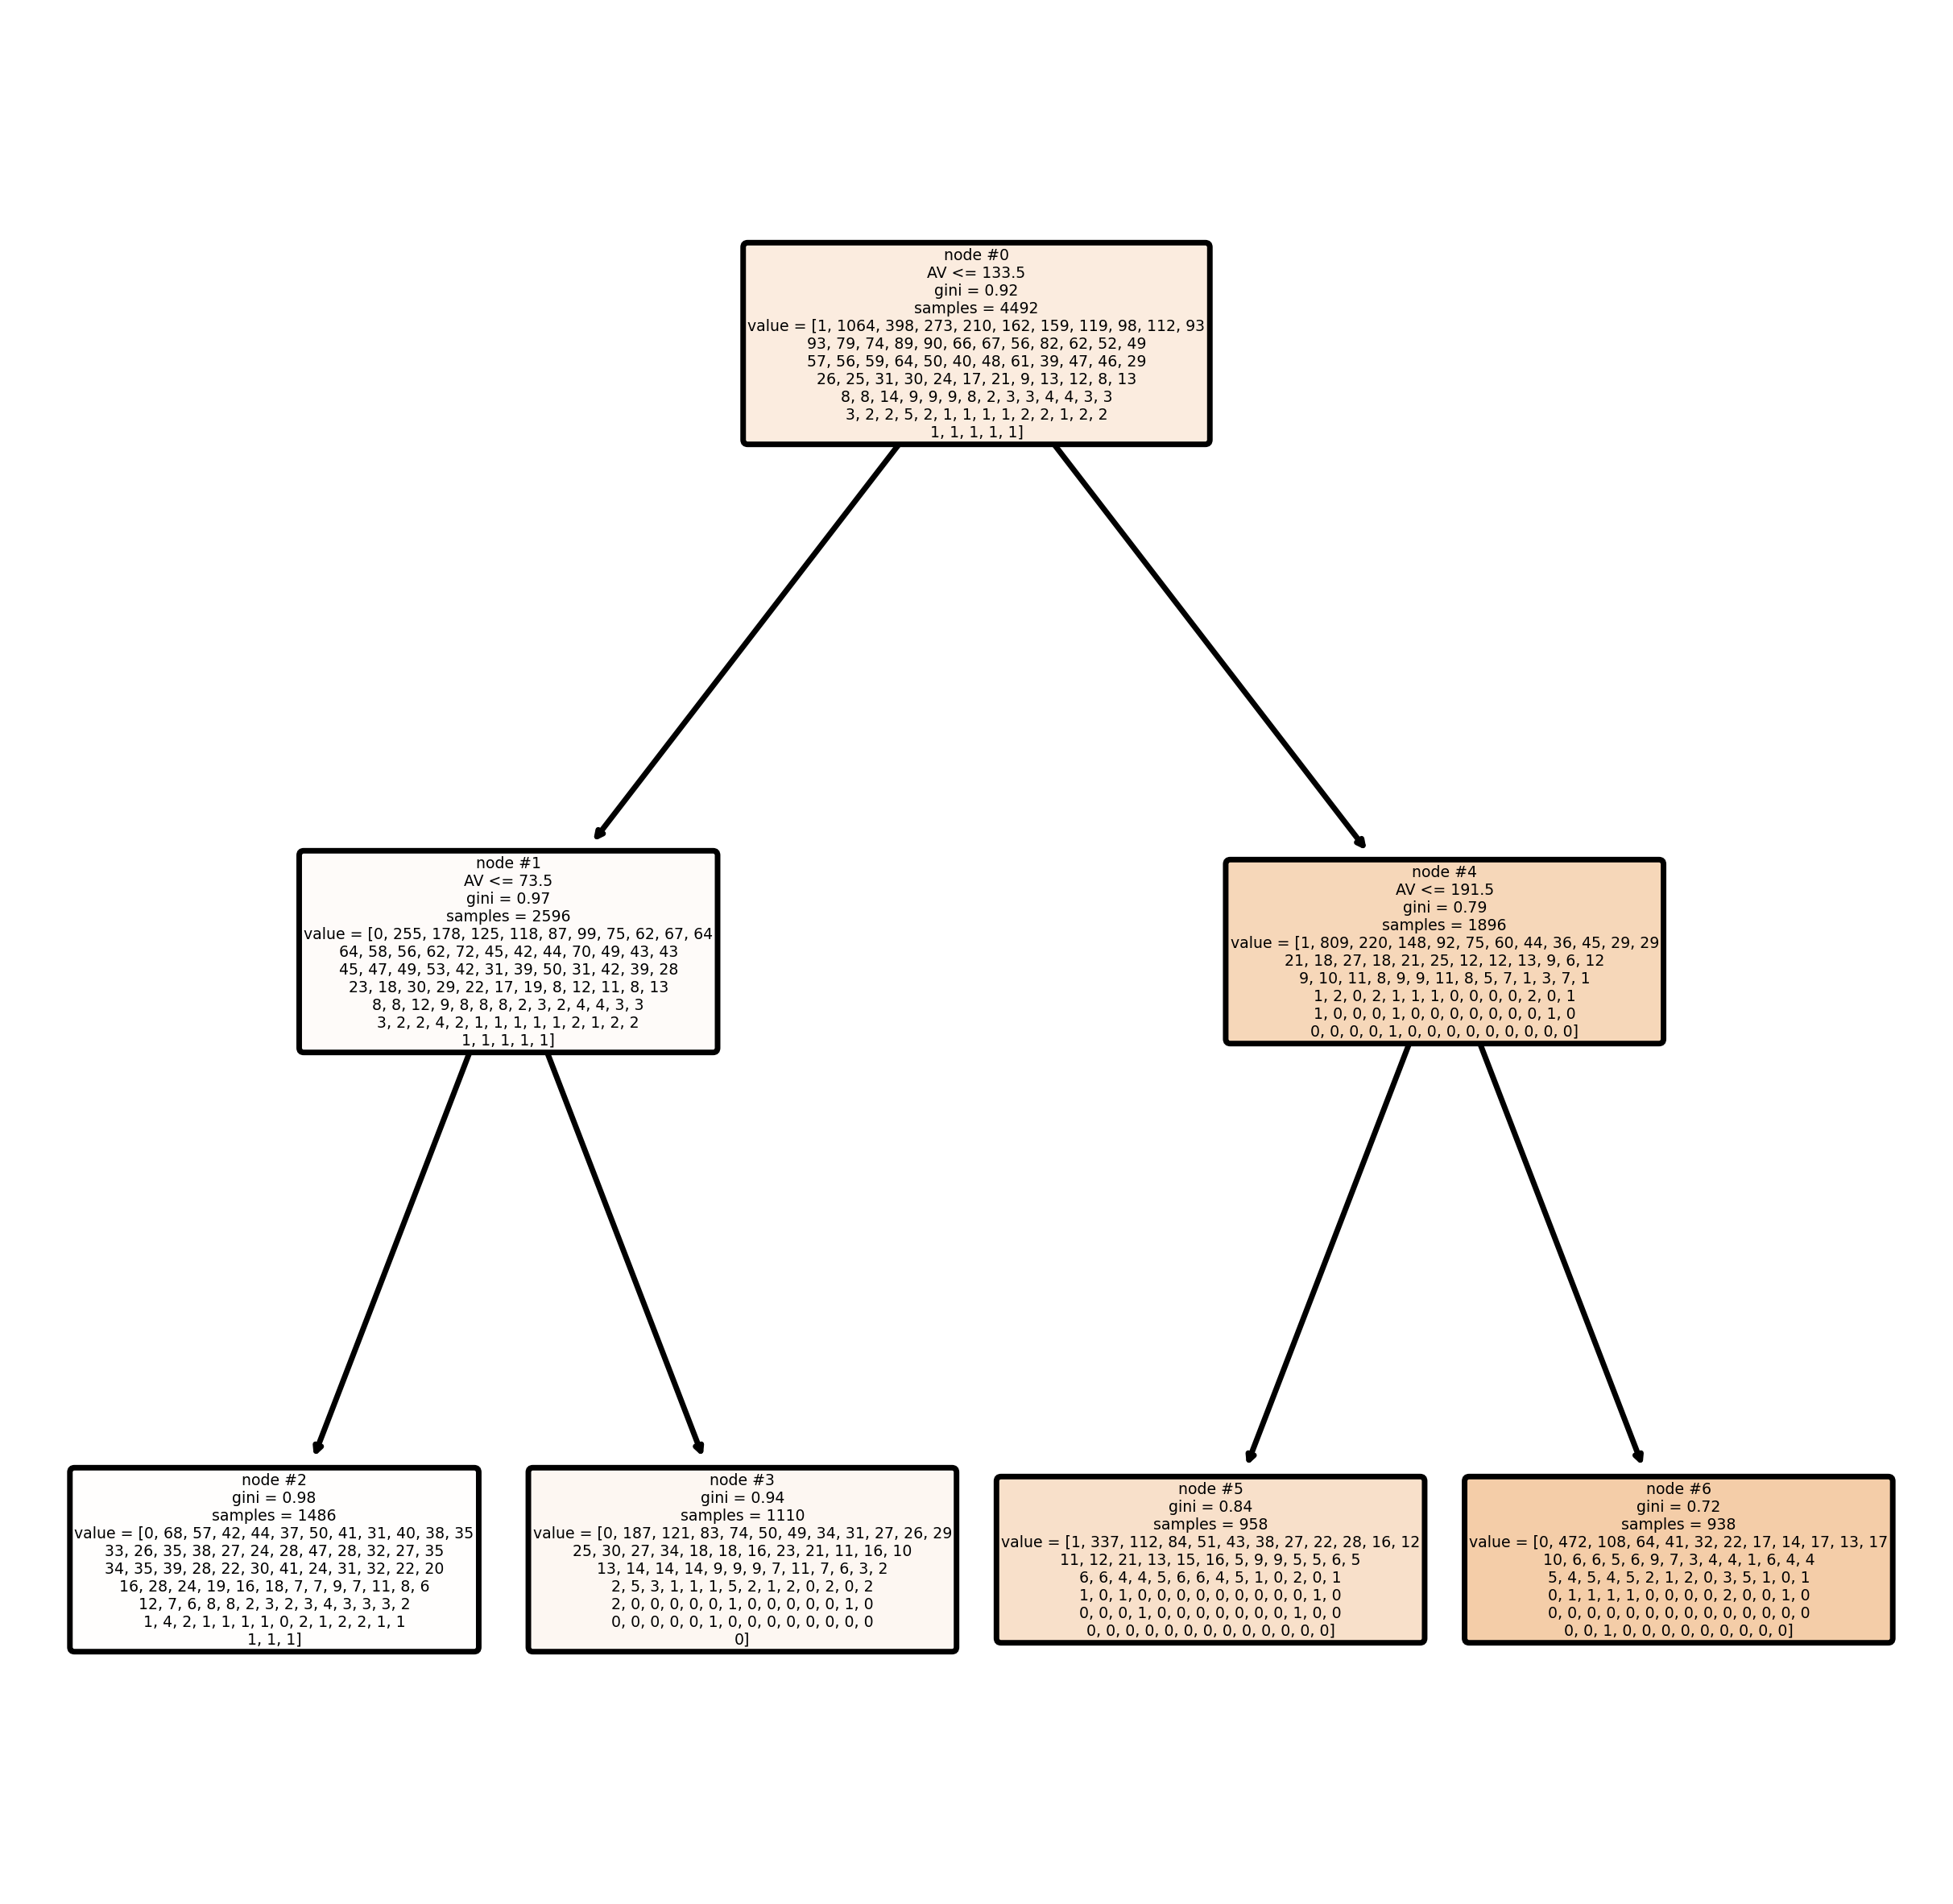

In [160]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=500)
tree.plot_tree(classifier, feature_names = main_columns, filled=True,
               impurity=True, node_ids=True, rounded=True, precision=2) # plots the tree 